In [2]:
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

from pathlib import Path
from functools import partial
from PIL import Image


Using TensorFlow backend.


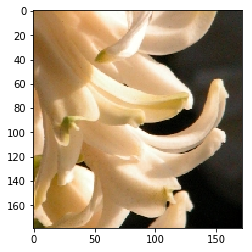

(179, 172, 3)


In [2]:
img = load_img('../data/91-image/t2.bmp')
x = img_to_array(img)
plt.imshow(x/255.)
plt.show()
print(x.shape)

In [3]:
def load_image_pair(path, scale=3):
    image = load_img(path)
    image = image.convert('YCbCr')
    hr_image = modcrop(image, scale)
    lr_image = bicubic_rescale(hr_image, 1 / scale)
    return lr_image, hr_image


def generate_sub_images(image, size, stride):
    for i in range(0, image.size[0] - size + 1, stride):
        for j in range(0, image.size[1] - size + 1, stride):
            yield image.crop([i, j, i + size, j + size])


def array_to_img(x, mode='YCbCr'):
    return Image.fromarray(x.astype('uint8'), mode=mode)


def bicubic_rescale(image, scale):
    if isinstance(scale, (float, int)):
        size = (np.array(image.size) * scale).astype(int)
    return image.resize(size, resample=Image.BICUBIC)


def modcrop(image, scale):
    size = np.array(image.size)
    size -= size % scale
    return image.crop([0, 0, *size])


In [5]:
repo_dir = Path('..')
data_dir = repo_dir / 'data'

In [5]:
i=0
dataset_name = '91-image'
for path in (data_dir / dataset_name).glob('*'):
    i+=1
    print(path)
    if i%4==0:
        break

../data/91-image/t63.bmp
../data/91-image/t44.bmp
../data/91-image/t20.bmp
../data/91-image/t52.bmp


In [10]:
lr_sub_size=11
lr_sub_stride=5
scale=3
dataset_name = '91-image'

hr_sub_size = lr_sub_size * scale # 33
hr_sub_stride = lr_sub_stride * scale # 15

lr_gen_sub = partial(generate_sub_images, size=lr_sub_size,
                     stride=lr_sub_stride)
hr_gen_sub = partial(generate_sub_images, size=hr_sub_size,
                     stride=hr_sub_stride)

lr_sub_arrays = []
hr_sub_arrays = []
for path in (data_dir / dataset_name).glob('*'):
    image = load_img(path)
    image = image.convert('YCbCr')
    hr_image = modcrop(image, scale)
    lr_image = bicubic_rescale(hr_image, 1 / scale)
    
    lr_sub_arrays += [img_to_array(img) for img in lr_gen_sub(lr_image)]
    hr_sub_arrays += [img_to_array(img) for img in hr_gen_sub(hr_image)]

x = np.stack(lr_sub_arrays)
y = np.stack(hr_sub_arrays)

In [11]:
# len(y)
len(x)

19382

<class 'PIL.Image.Image'>
(145, 117)
(435, 351)


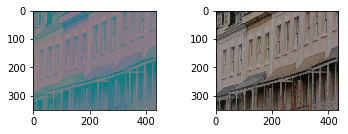

In [50]:
lr_image, hr_image = load_image_pair(str(path), scale=scale)
hr_imagecov = hr_image.convert('RGB')
lr_imagecov = lr_image.convert('RGB')

plt.subplot(2,2,1)
plt.imshow(np.asarray(hr_image))
plt.subplot(2,2,2)
plt.imshow(np.asarray(hr_imagecov))
print(type(hr_imagecov))
print(lr_image.size)
print(hr_image.size)

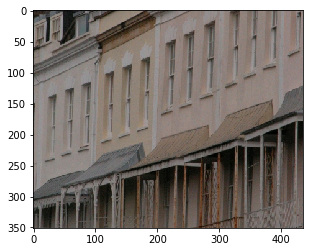

In [8]:
plt.imshow(img_to_array(hr_imagecov)/255.0)
plt.show()

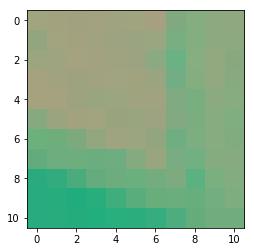

In [15]:
plt.imshow(lr_sub_arrays[0]/255.0)

In [42]:
lr_sub_arrays[0].shape

(11, 11, 3)

In [43]:
len(lr_sub_arrays)

19382

In [53]:
lr_sub_arrays[0].shape

(11, 11, 3)

In [19]:
len(hr_sub_arrays)

19382

In [30]:
lr_sub_arrays=[]
hr_sub_arrays=[]
for path in (data_dir / dataset_name).glob('*'):
    image = load_img(path)
#     image = image.convert('YCbCr')
    hr_image = modcrop(image, scale)
    lr_image = bicubic_rescale(hr_image, 1 / scale)
    
    lr_sub_arrays += [img for img in lr_gen_sub(lr_image)]
    hr_sub_arrays += [img for img in hr_gen_sub(hr_image)]

AttributeError: 'Image' object has no attribute 'shape'

In [36]:
len([img for img in lr_gen_sub(lr_image)])

594

In [55]:
x.shape[1:]

(11, 11, 3)